In [1]:
import os
import sys
import inspect

current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir)

import tf_som

In [2]:
tf_som.setup_tensorflow_for_cpus()

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('colors.csv')

colors = np.float32(tf_som.normalize(df[['R', 'G', 'B']]).values)

names = df['Color-Name'].values

n_dim = len(df.columns) - 1

2022-09-07 00:33:22.027103: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
100%|██████████| 25/25 [00:00<00:00, 201.97it/s]


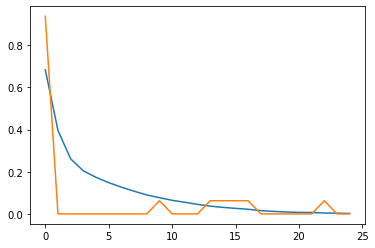

In [5]:
m = 24
n = 32

som = tf_som.SOM(m, n, 3, seed = 1357, dtype = np.float32, learning_rate = 0.3, radius = 7.0, sigma = 1.0, epochs = 25)

som.train(colors)

plt.plot(som.get_quantization_errors())
plt.plot(som.get_topographic_errors())

som.save('foo.fits', file_format = 'fits')
som.load('foo.fits', file_format = 'fits')
som.save('foo.h5', file_format = 'hdf5')
som.load('foo.h5', file_format = 'hdf5')

In [6]:
image_grid = som.get_centroids()

activation_map = som.activation_map(colors)

distance_map = som.distance_map()

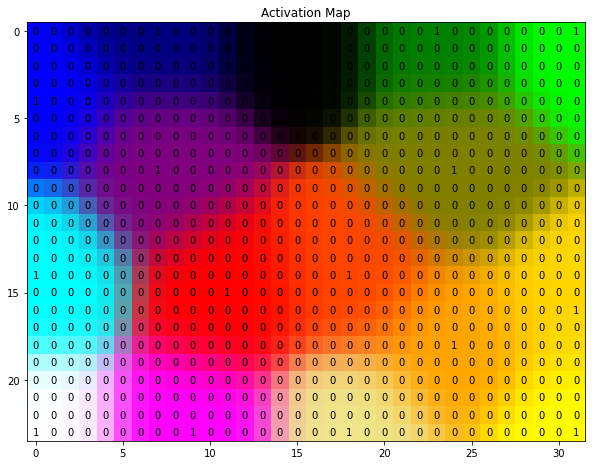

In [7]:
plt.figure(figsize = (2 * 5, 2 * 4))

plt.imshow(image_grid)
plt.title('Activation Map')

for i in range(m):
    for j in range(n):

        plt.text(j, i, '{}'.format(activation_map[i, j]), ha = 'center', va = 'center',
             bbox = dict(
                 facecolor = 'white',
                 alpha = 0.0,
                 lw = 0
             )
        )

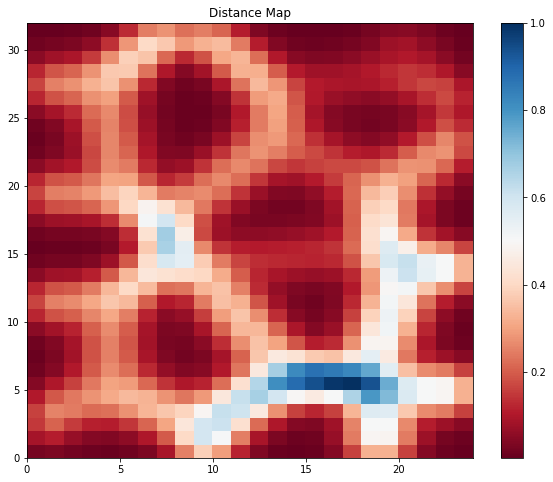

In [8]:
plt.figure(figsize = (2 * 5, 2 * 4))

plt.pcolor(distance_map.T, cmap = 'RdBu')
plt.title('Distance Map')
plt.colorbar()